In [ ]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install esoreader

  Using cached esoreader-1.2.3.tar.gz (3.9 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for esoreader: filename=esoreader-1.2.3-py3-none-any.whl size=4699 sha256=5dc9b0e4a1b8ddca2f94701839e443540f60351e73f8a48bf071a54971d050bb
  Stored in directory: c:\users\benja\appdata\local\pip\cache\wheels\3a\32\46\0cca1a0ed7af73b3c9dbc61fd1fd58319924a603d2f7241978
Successfully built esoreader
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import opyplus as op
from eppy import modeleditor
from eppy.modeleditor import IDF
import pandas as pd
import glob
from eppy.runner.run_functions import runIDFs
from itertools import starmap
import numpy as np
import esoreader
from itertools import chain
import shutil
import matplotlib.pyplot as plt

In [ ]:
eplus_dir_path = op.get_eplus_base_dir_path((9, 4, 0))

In [ ]:
# df_changed= pd.read_csv(os.path.join(eplus_dir_path,"ExampleFiles","simulation","changed_idf",'csv-eso-1.csv'))

In [ ]:
# (df_original/3600000).plot(kind='bar')

In [ ]:
# (df_changed[df_changed.columns[1:]]/3600000).plot(kind='bar')

In [ ]:
df_= pd.read_excel('./Downloads/variables.xlsx',sheet_name='Input Variables')
df_= df_.loc[:, ~df_.columns.str.contains('^Unnamed')]

#generates values in ranges
ranges= df_.T.values
df= pd.DataFrame(list(starmap(lambda *x: np.random.uniform(*x, size=100), ranges))).T
df.columns= df_.columns

df.iloc[0]= df_.iloc[0]
df.iloc[-1]= df_.iloc[-1]

obj_num_df= pd.read_excel('./Downloads/variables.xlsx',sheet_name='Location')
obj_num_df = obj_num_df.loc[:, ~obj_num_df.columns.str.contains('^Unnamed')]

obj_name_df= pd.read_excel('./Downloads/variables.xlsx',sheet_name='ObjectName')
obj_name_df = obj_name_df.loc[:, ~obj_name_df.columns.str.contains('^Unnamed')]

In [ ]:
def get_mapped_vals(col):
    if col=='Wall R value':
        return 'Thermal_Resistance'
    
    elif col=='Roof R value':
        return 'Thermal_Resistance'
    
    elif col== 'HVAC COP':
        return 'Gross_Rated_Cooling_COP'
    
    elif col=='Window U value':
        return 'UFactor'
    
    elif col== 'Window SGHC':
        return 'Solar_Heat_Gain_Coefficient'
    
    elif col== 'Cool setpoint':
        return 'Value_Until_Time_1'
    
    elif col=='Light Pwr Density':
        return 'Watts_per_Zone_Floor_Area'
    
    elif col== 'PV Tilt angle':
        return 'Tilt_Angle'
    
def make_mappings(obj_num_df, obj_name_df):       
    mapping= dict()
    
    for col in obj_num_df.columns:    
        mapping[col]= [obj_name_df[col].dropna().tolist(),(obj_num_df[col].dropna().astype(int)-1).tolist(),get_mapped_vals(col)] 
    return mapping

mappings= make_mappings(obj_num_df,obj_name_df)

In [ ]:
def edit_idf(idf_path, idd_path, eplus_dir_path, mappings, change_values_df, simulation_name="my-first-simulation"):
    #mapping: mapped names of excel to energyplus
    #obj_num number: of object value to be replaced as per energyplus
    #change_value: new value which is supposed to be changed as per excels
    columns= change_values_df.columns
    
    IDF.setiddname(idd_path)
    
    for idx,row in change_values_df.iterrows():
        
        idf1= IDF(idf_path)
        #epm = op.Epm.from_idf(idf_path,idd_or_version=idd)
        
        for col in columns:
            obj_names= mappings[col][0]
            obj_idxs= mappings[col][1]
            obj_inner_name= mappings[col][2]
            
            for obj_name in obj_names:
                
                for obj_idx in obj_idxs:
                    print(obj_name, obj_idx, obj_inner_name)
                    idf1.idfobjects[obj_name][obj_idx][obj_inner_name] = row[col]
        file_name= os.path.join(eplus_dir_path,"ExampleFiles","simulation","changed_idf","idf-updated-"+str(idx+1)+".idf")
        
        idf1.save((file_name))
            
idf_path = os.path.join(eplus_dir_path,
    "ExampleFiles","simulation",
    "lastfile.idf"
    )
idd_path= os.path.join(eplus_dir_path, 'Energy+.idd')
#idd= op.Idd(idd_path)

edit_idf(idf_path, idd_path, eplus_dir_path, mappings, df)

Material:NoMass 5 Thermal_Resistance
Material:NoMass 6 Thermal_Resistance
Coil:Cooling:DX:SingleSpeed 0 Gross_Rated_Cooling_COP
Coil:Cooling:DX:SingleSpeed 1 Gross_Rated_Cooling_COP
Coil:Cooling:DX:SingleSpeed 2 Gross_Rated_Cooling_COP
WindowMaterial:SimpleGlazingSystem 0 UFactor
WindowMaterial:SimpleGlazingSystem 0 Solar_Heat_Gain_Coefficient
Schedule:Day:Interval 37 Value_Until_Time_1
Lights 0 Watts_per_Zone_Floor_Area
Lights 1 Watts_per_Zone_Floor_Area
Lights 2 Watts_per_Zone_Floor_Area
Lights 3 Watts_per_Zone_Floor_Area
Lights 4 Watts_per_Zone_Floor_Area
Lights 5 Watts_per_Zone_Floor_Area
Lights 6 Watts_per_Zone_Floor_Area
Lights 7 Watts_per_Zone_Floor_Area
Lights 8 Watts_per_Zone_Floor_Area
Lights 9 Watts_per_Zone_Floor_Area
Lights 10 Watts_per_Zone_Floor_Area
Lights 11 Watts_per_Zone_Floor_Area
Lights 12 Watts_per_Zone_Floor_Area
Lights 13 Watts_per_Zone_Floor_Area
Lights 14 Watts_per_Zone_Floor_Area
Lights 15 Watts_per_Zone_Floor_Area
Lights 16 Watts_per_Zone_Floor_Area
Generato

In [ ]:
idf_path

'C:\\\\EnergyPlusV9-4-0\\ExampleFiles\\simulation\\lastfile.idf'

In [ ]:
# epw path
epw_path = os.path.join(eplus_dir_path,
    "ExampleFiles","simulation",
    "USA_FL_Melbourne.Rgnl.AP.722040_TMY3.epw"
)


idf_paths= glob.glob(os.path.join(eplus_dir_path,"ExampleFiles","simulation","changed_idf")+ '\\*.idf')

IDF.setiddname(idd_path)
for idf_path1 in idf_paths:
    idf1= IDF(idf_path1,epw_path)

    fname= idf1.idfname
    idf1.run(output_prefix=os.path.basename(fname).split('.')[0],
            output_directory=os.path.join(os.path.dirname(fname),'eppy_dump'))


C:\EnergyPlusV9-4-0\energyplus.exe --weather C:\EnergyPlusV9-4-0\ExampleFiles\simulation\USA_FL_Melbourne.Rgnl.AP.722040_TMY3.epw --output-directory C:\EnergyPlusV9-4-0\ExampleFiles\simulation\changed_idf\eppy_dump --idd C:\EnergyPlusV9-4-0\Energy+.idd --output-prefix idf-updated-1 C:\Users\Benja\in.idf



KeyboardInterrupt: ignored

In [ ]:
# idf_pat = os.path.join(eplus_dir_path,
#     "ExampleFiles","simulation",
#     "lastfile.idf"
#     )
# # fn=idf.idfname
# idf = IDF(idf_pat, epw_path)
# idf.run(output_prefix=os.path.basename(fn).split('.')[0],
#             output_directory=os.path.join(os.path.dirname(fn),'C:\EnergyPlusV9-4-0\ExampleFiles\simulation\changed_idf\simulation'))

In [ ]:
def get_df(eso_path):
    
    eso_data=[]
    for PATH_TO_ESO in eso_paths:
        dd, data = esoreader.read(PATH_TO_ESO)
        eso_data.append(list(chain.from_iterable(list(data.values()))))

    cols=[]
    for key in data.keys():
        cols.append(dd.variables[key][2])

    df= pd.DataFrame(eso_data,columns=cols)
    
   # shutil.rmtree(os.path.join(*eso_paths[0].split('\\')[:-1]))
    return df

eso_paths= glob.glob(os.path.join(eplus_dir_path,"ExampleFiles","simulation","changed_idf",'eppy_dump')+ '\\*.eso')

df_to_save= get_df(eso_paths)
df_to_save/= 3600000 # change units from Joules to kWh for energy Consumption


In [ ]:
df_to_save.to_csv(os.path.join(eplus_dir_path,"ExampleFiles","simulation","changed_idf")+'\\data_concat.csv',index=False)

In [ ]:
df_to_save

,Electricity:Facility,ElectricityProduced:Facility,ElectricityPurchased:Facility
0,27653.417279,13913.308804,15888.619182
1,68070.424762,13869.082483,55525.805690
2,64135.357171,13596.637332,51860.417045
3,31823.236867,13915.668285,19872.518036
4,71277.976263,13917.390135,58701.132450
...,...,...,...
95,31738.522168,13630.245774,19952.754758
96,55744.567627,13879.037254,43352.252480
97,38286.518724,13865.238812,26124.892818
98,71934.577140,13880.608306,59352.286408


In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Annual Net Site Energy Building Design Variables')

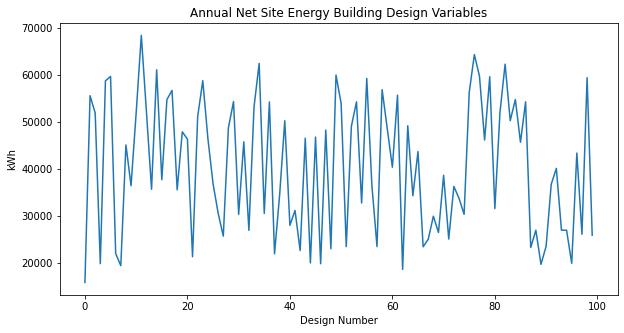

In [ ]:
ax = df_to_save['ElectricityPurchased:Facility'].plot(figsize=(10, 5))
ax.set_ylabel("kWh")
ax.set_xlabel("Design Number")
ax.set_title("Annual Net Site Energy Building Design Variables")

Text(0, 0.5, 'kWh')

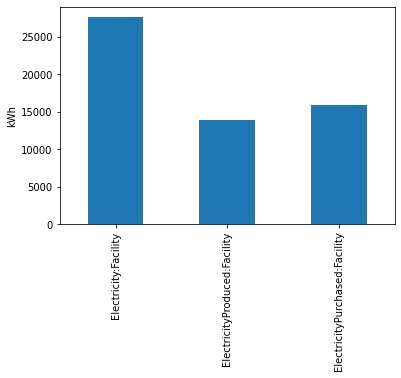

In [ ]:
ax= df_to_save.iloc[0].plot(kind='bar')
ax.set_ylabel("kWh")

Text(0, 0.5, 'kWh')

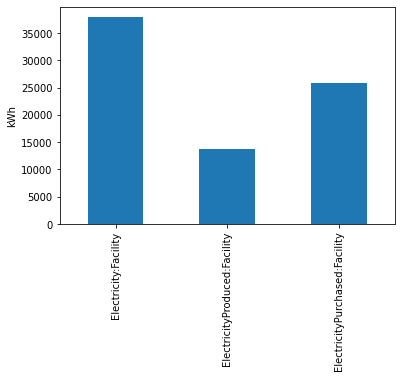

In [ ]:
ax= df_to_save.iloc[-1].plot(kind='bar')
ax.set_ylabel("kWh")

Text(0, 0.5, 'kWh')

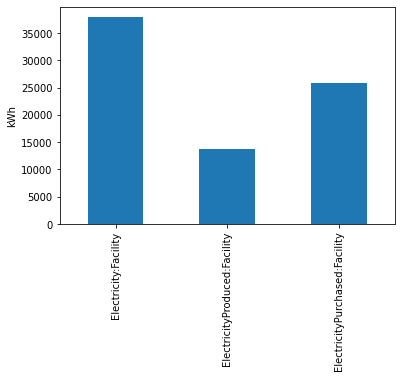

In [ ]:
ax= df_to_save.iloc[-1].plot(kind='bar')
ax.set_ylabel("kWh")